In [15]:
import os, re
import urllib.request as ur
from bs4 import BeautifulSoup as bs

In [20]:
url = "https://gamerant.com/pokemon-go-player-intense-encounter-scanning-pokestop/"

In [21]:
soup = bs(ur.urlopen(url).read(), 'html.parser')
soup

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="user-scalable=yes, initial-scale=1.0, width=device-width" name="viewport"/>
<link href="https://static0.gamerantimages.com/" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link as="image" href="https://static0.gamerantimages.com/wordpress/wp-content/uploads/2021/12/pokemon-jigglypuff-angry-feature.jpg?q=50&amp;fit=contain&amp;w=480&amp;h=300&amp;dpr=1.5" importance="high" media="(max-width: 480px)" rel="preload"/><link as="image" href="https://static0.gamerantimages.com/wordpress/wp-content/uploads/2021/12/pokemon-jigglypuff-angry-feature.jpg?q=50&amp;fit=contain&amp;w=767&amp;h=450&amp;dpr=1.5" importance="high" media="(min-width: 481px) and (max-width: 767px)" rel="preload"/><link as="image" href="https://static0.gamerantimages.com/wordpress/wp-content/uploads/2021/12/pokemon-jigglypuff-angry-feature.jpg?q=50&amp;fit=con

In [49]:
word = []
for i in soup.find_all('p'):
    word.append(i.text)
word

["One Pokemon GO player shares an intense encounter they had while using the game's new Powered-Up PokeStop feature to scan a real-life area.",
 'PokeStops are one of the most important gameplay aspects of Pokemon GO, so when changes are made to them, the whole game is affected. The recent addition of Powered-Up PokeStops, which take advantage of AR scanning technology, is already having an impact on Pokemon GO. However, one player claims that Niantic failed to take into account the social pressure around scanning a PokeStop in public.',
 'The new Powered-Up PokeStop feature allows players to temporarily power up a PokeStop and enhance the rewards gained by spinning it by teaming up to scan the real-life location the PokeStop is attached to using their smartphone cameras. This may seem relatively straightforward to gamers. However, as Pokemon GO is a game that requires players to go outside--often in public--there is a downside.',
 'RELATED: Pokemon GO Holiday 2021 Event Adding Bergmit

In [51]:
f = open("poketmon.txt", 'w', encoding='utf-8')
for i in word:
    f.write(i)
f.close()

In [44]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.tag import pos_tag

In [54]:
file = open('poketmon.txt', encoding='utf8')
word = file.read()
word

"One Pokemon GO player shares an intense encounter they had while using the game's new Powered-Up PokeStop feature to scan a real-life area.PokeStops are one of the most important gameplay aspects of Pokemon GO, so when changes are made to them, the whole game is affected. The recent addition of Powered-Up PokeStops, which take advantage of AR scanning technology, is already having an impact on Pokemon GO. However, one player claims that Niantic failed to take into account the social pressure around scanning a PokeStop in public.The new Powered-Up PokeStop feature allows players to temporarily power up a PokeStop and enhance the rewards gained by spinning it by teaming up to scan the real-life location the PokeStop is attached to using their smartphone cameras. This may seem relatively straightforward to gamers. However, as Pokemon GO is a game that requires players to go outside--often in public--there is a downside.RELATED: Pokemon GO Holiday 2021 Event Adding BergmiteReddit user p47

In [55]:
tagged_list = pos_tag(word_tokenize(word))
tagged_list

[('One', 'CD'),
 ('Pokemon', 'NNP'),
 ('GO', 'NNP'),
 ('player', 'NN'),
 ('shares', 'NNS'),
 ('an', 'DT'),
 ('intense', 'JJ'),
 ('encounter', 'NN'),
 ('they', 'PRP'),
 ('had', 'VBD'),
 ('while', 'IN'),
 ('using', 'VBG'),
 ('the', 'DT'),
 ('game', 'NN'),
 ("'s", 'POS'),
 ('new', 'JJ'),
 ('Powered-Up', 'NNP'),
 ('PokeStop', 'NNP'),
 ('feature', 'NN'),
 ('to', 'TO'),
 ('scan', 'VB'),
 ('a', 'DT'),
 ('real-life', 'JJ'),
 ('area.PokeStops', 'NNS'),
 ('are', 'VBP'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('most', 'RBS'),
 ('important', 'JJ'),
 ('gameplay', 'NN'),
 ('aspects', 'NNS'),
 ('of', 'IN'),
 ('Pokemon', 'NNP'),
 ('GO', 'NNP'),
 (',', ','),
 ('so', 'RB'),
 ('when', 'WRB'),
 ('changes', 'NNS'),
 ('are', 'VBP'),
 ('made', 'VBN'),
 ('to', 'TO'),
 ('them', 'PRP'),
 (',', ','),
 ('the', 'DT'),
 ('whole', 'JJ'),
 ('game', 'NN'),
 ('is', 'VBZ'),
 ('affected', 'VBN'),
 ('.', '.'),
 ('The', 'DT'),
 ('recent', 'JJ'),
 ('addition', 'NN'),
 ('of', 'IN'),
 ('Powered-Up', 'NNP'),
 ('PokeSt

In [67]:
from nltk import Text
from nltk import FreqDist

In [78]:
retokenize = RegexpTokenizer('[\w]+')
text = Text(retokenize.tokenize(word))
text

<Text: One Pokemon GO player shares an intense encounter...>

In [79]:
stopwords = ['the','to','of','a','and','that','is','they','them','it','Up','in','by','one','she','p4755166']

In [97]:
names_list = [t[0] for t in tagged_list if (t[1] == "NN") | (t[1] == "NNP") | (t[1] == "NNG")and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [86]:
fd_names.most_common(5)

[('GO', 12),
 ('Pokemon', 10),
 ('PokeStop', 9),
 ('Powered-Up', 5),
 ('player', 3)]

In [91]:
fd_names.freq('Pokemon')

0.07194244604316546

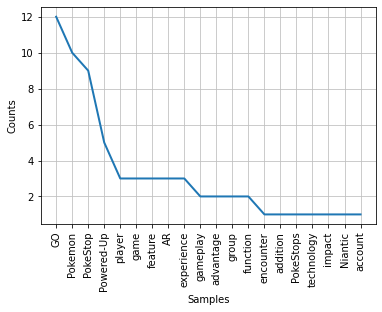

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [88]:
fd_names.plot(20)

In [89]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

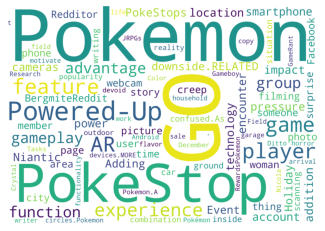

In [90]:
wc = WordCloud(width=2000, height=1400, background_color='white', random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()

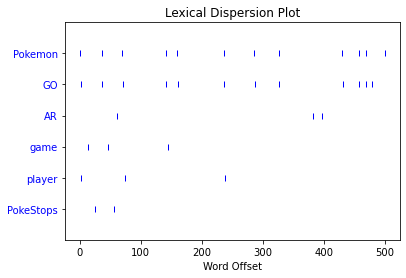

In [93]:
text.dispersion_plot(['Pokemon','GO','AR','game','player','PokeStops'])